### A Linear Regression Model
 * The idea is to make a model to predict the parameters and find a satisfactory solution

In [129]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [130]:
weight= 0.8
bias=0.6

#Create
start=0
end=10
step=0.2
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias  #formula of linear regression

X[:10],y[:10]

(tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000],
         [1.0000],
         [1.2000],
         [1.4000],
         [1.6000],
         [1.8000]]),
 tensor([[0.6000],
         [0.7600],
         [0.9200],
         [1.0800],
         [1.2400],
         [1.4000],
         [1.5600],
         [1.7200],
         [1.8800],
         [2.0400]]))

In [131]:
len(X),len(y)

(50, 50)

In [132]:
#create a train/test split
train_split=int(0.8*len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [133]:
def plot_prediction(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,prediction=None):
  plt.figure(figsize=(5,3))

  #training data in Blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")

  # Testing data in red
  plt.scatter(test_data,test_labels,c="r",s=4,label="Test data")

  # Are there predictions?
  if prediction is not None:
    plt.scatter(test_data,prediction,c="g",s=4, label="Predictions")
  plt.legend(prop={"size":14});


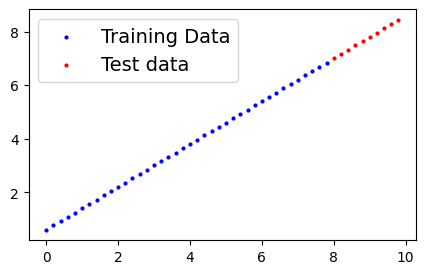

In [134]:
plot_prediction();

In [135]:
# Building the model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    self.bias= nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

  def forward(self,x :torch.Tensor):
    return self.weights*x+self.bias

In [136]:
# Create random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model = LinearRegressionModel()

# Check out the parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [137]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [138]:
# Make predictions with model
with torch.inference_mode():
  y_preds=model(X_test)

y_preds

tensor([[2.8223],
        [2.8897],
        [2.9570],
        [3.0243],
        [3.0917],
        [3.1590],
        [3.2264],
        [3.2937],
        [3.3610],
        [3.4284]])

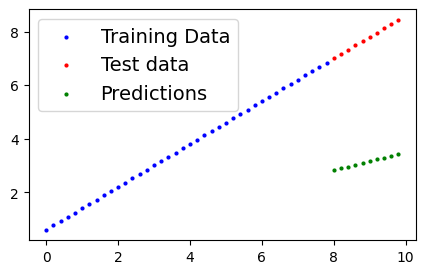

In [139]:
plot_prediction(prediction=y_preds);

In [140]:
# Setup a loss function
loss_fn=nn.L1Loss()

# Setup an optimizer (Stochastic gradient descent)
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.01) #lr = learning rate=possibly the most important hyperparametre (you can set)


In [141]:
torch.manual_seed(42)

epochs = 100
### Training

for epoch in range(epochs):

  model.train()

  y_pred=model(X_train)

  loss=loss_fn(y_pred,y_train)
  # print(f"Loss: {loss}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():

    test_pred=model(X_test)


    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    print(f"Epoch:{epoch} | Loss:{loss} | Test loss:{test_loss} ")

    print(model.state_dict())

Epoch:0 | Loss:2.2780983448028564 | Test loss:4.237546443939209 
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss:0.6570987701416016 | Test loss:0.6665477156639099 
OrderedDict([('weights', tensor([0.7657])), ('bias', tensor([0.2388]))])
Epoch:20 | Loss:0.13121899962425232 | Test loss:0.18222084641456604 
OrderedDict([('weights', tensor([0.8550])), ('bias', tensor([0.2928]))])
Epoch:30 | Loss:0.11426033079624176 | Test loss:0.16804122924804688 
OrderedDict([('weights', tensor([0.8488])), ('bias', tensor([0.3338]))])
Epoch:40 | Loss:0.09681833535432816 | Test loss:0.15297117829322815 
OrderedDict([('weights', tensor([0.8425])), ('bias', tensor([0.3748]))])
Epoch:50 | Loss:0.08019961416721344 | Test loss:0.14057135581970215 
OrderedDict([('weights', tensor([0.8365])), ('bias', tensor([0.4158]))])
Epoch:60 | Loss:0.06936819106340408 | Test loss:0.23553124070167542 
OrderedDict([('weights', tensor([0.8429])), ('bias', tensor([0.4538]))])
Epoch:70 | L

In [142]:
with torch.inference_mode():
  y_new=model(X_test)

In [143]:
y_test, y_new

(tensor([[7.0000],
         [7.1600],
         [7.3200],
         [7.4800],
         [7.6400],
         [7.8000],
         [7.9600],
         [8.1200],
         [8.2800],
         [8.4400]]),
 tensor([[7.0115],
         [7.1731],
         [7.3348],
         [7.4964],
         [7.6580],
         [7.8196],
         [7.9812],
         [8.1429],
         [8.3045],
         [8.4661]]))

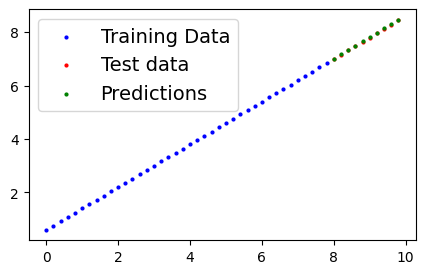

In [144]:
plot_prediction(prediction=y_new);